# Data Analysis and Machine Learning Task

We will try to answer the following questions based on the Imaging-guided prostate cancer detection Dataset
1. Review and analyse the dataset.
2. Can we apply machine learning to this dataset? If yes, then show us how, apply at least two different machine learning algorithms, and compare their results.
3. Can we compare the systematic biopsy (SB) and MRI-targeted biopsy (TB) results with a machine learning model? If yes, then how?

We will initiate our analysis from importing libraries, loading data, doing exploratory data analysis and then data visualization based on the given data

# We need the following python packages to run this file <br>
pip install pandas<br>
seaborn as sns <br>
pip install xlrd <br>
pip install plotly

## Step1: Import Useful Libraries

In [1]:
# For data analysis, we import pandas library
import pandas as pd

# For numerical computation, we will use numpy library
import numpy as np

# For data visualization, we will use matplotlib and seaborn library
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

## Step2: Load and explore data

In [2]:
#load data from excel file, since we have two sheets we will load them separately
baseline = pd.read_excel("MRI_Biopsy_Data.xls", sheet_name="Baseline")
biopsy = pd.read_excel("MRI_Biopsy_Data.xls", sheet_name="Biopsy")


In [3]:
# check 5 random sample values from  Baseline Sheet
baseline.sample(5)

,Age,PSA,Volume,PSAD,PIRADS,ISUP
550,63,5.37,84.0,0.063929,4,3
108,73,7.53,76.0,0.099079,3,0
639,71,14.00,62.0,0.225806,5,2
56,71,8.38,59.7,0.140369,3,0
500,59,4.30,33.0,0.130303,4,2


## First we will explain few columns for better understanding of Dataset
### PI-RADS (Prostate Imaging Reporting and Data System)
The aim of prostate MRI using PI-RADS is to assess the risk of clinically significant prostate cancer being present. <br>
PI-RAD Sscores range from 1 (most likely not cancer) to 5 (very suspicious). The five scores include:<br>
PIRADS = <br>
{1: 'Very Low', <br>
2: 'Low', <br>
3: 'Intermediate (undetermined)', <br>
4: 'High', <br>
5: 'Very High'}<br>

### PSA (Prostate Specific Antigen) 
This test is used to monitor the males after prostate cancer surgery or radiation to check if the cancer has recurred.<br> 
For 40-50 years of age <br>
Normal value: 0-2.5 <br>
For 50-60 years of age <br>
Normal value: 2.5-3.5<br>
For 60-70 years of age <br>
Normal value: 3.5-4.5<br>
For 70-80 years of age<br>
Normal value: 4.5-5.5<br>

### PSAD (Prostate Specific Antigen Density)
The PSA density (PSAD) is sometimes used for men with large prostate glands A higher PSA density indicates a greater likelihood of cancer.


### ISUP
The new system grades the cancer between 1 and 5 depending on the Gleason score. The lower the grade the less likely the cancer is to spread. This score helps the cancer treatment team plan  the treatment.

### GLEASON SCORE
The Gleason grading system is used to help evaluate the prognosis of men with prostate cancer using samples from a prostate biopsy.

### NORMAL GLEASON SCORE
Higher numbers indicate a faster growing cancer that is more likely to spread. Currently the lowest score assigned to a tumor is grade 3. Grades below 3 show normal to near normal cells

In [4]:
# check 5 random sample values from  Biopsy Sheet
biopsy.sample(5)

,PIRADS,Gleason_SB_TB,Gleason_TB,Gleason_SB,Scanner,IL_Localisation*,IL_Diameter*
50,3,0.0,0.0,0.0,1.0,2,15.0
240,4,0.0,0.0,0.0,1.0,2,14.0
694,3,7.5,7.5,7.5,1.0,2,10.0
454,4,6.0,0.0,6.0,1.0,1,12.0
747,4,8.0,8.0,8.0,2.0,1,8.0


In [21]:
#For better analyzation of data we will use built-in function
baseline.describe()

,Age,PSA,Volume,PSAD,PIRADS,ISUP
count,785.000000,774.000000,765.000000,765.000000,785.000000,785.000000
mean,64.657325,10.034806,54.157516,0.223394,3.960510,1.400000
std,9.206587,7.066104,31.009272,0.198762,0.780646,1.491643
min,30.000000,0.600000,9.000000,0.000000,1.000000,0.000000
25%,58.000000,5.885000,33.000000,0.114198,3.000000,0.000000
50%,65.000000,8.080000,47.000000,0.172364,4.000000,1.000000
75%,72.000000,12.000000,66.000000,0.256429,5.000000,2.000000
max,87.000000,74.000000,313.000000,2.475769,5.000000,5.000000


In [22]:
#For better analyzation of data we will use built-in function
biopsy.describe()

,PIRADS,Gleason_SB_TB,Gleason_TB,Gleason_SB,Scanner,IL_Diameter*
count,785.000000,785.000000,785.000000,785.000000,744.000000,758.000000
mean,3.960510,4.178981,3.523567,3.205096,1.409946,13.765172
std,0.780646,3.570375,3.626331,3.522971,0.737358,5.076456
min,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,3.000000,0.000000,0.000000,0.000000,1.000000,11.000000
50%,4.000000,6.000000,0.000000,0.000000,1.000000,13.000000
75%,5.000000,7.000000,7.000000,7.000000,2.000000,15.000000
max,5.000000,10.000000,10.000000,10.000000,4.000000,43.000000


In [5]:
# Check shape of data
rows, columns = baseline.shape
rows1, columns1 = biopsy.shape

print(f'In Baseline Sheet there are {rows} rows and {columns} columns')

print(f'In Biopsy Sheet there are {rows1} rows and {columns1} columns')

In Baseline Sheet there are 785 rows and 6 columns
In Biopsy Sheet there are 785 rows and 7 columns


In [6]:
# Check Structure of data
baseline.info()
biopsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     785 non-null    int64  
 1   PSA     774 non-null    float64
 2   Volume  765 non-null    float64
 3   PSAD    765 non-null    float64
 4   PIRADS  785 non-null    int64  
 5   ISUP    785 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 36.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PIRADS            785 non-null    int64  
 1   Gleason_SB_TB     785 non-null    float64
 2   Gleason_TB        785 non-null    float64
 3   Gleason_SB        785 non-null    float64
 4   Scanner           744 non-null    float64
 5   IL_Localisation*  752 non-null    object 
 6   IL_Diameter*      758 non-null    float64
dtypes: float64(5), in

In [7]:
# Check missing values in Baseline dataset
baseline.isnull().sum()

Age        0
PSA       11
Volume    20
PSAD      20
PIRADS     0
ISUP       0
dtype: int64

**As we saw there are 11,20,20 missing values in PSA, Volume and PSAD columns**

In [8]:
# Check missing values in Biopsy dataset
biopsy.isnull().sum()

PIRADS               0
Gleason_SB_TB        0
Gleason_TB           0
Gleason_SB           0
Scanner             41
IL_Localisation*    33
IL_Diameter*        27
dtype: int64

**As we saw there are 41,33,27 missing values in Scanner, IL_Locallisation and IL_Diameter columns**

## Step3: Data Analysis and Data Visualization

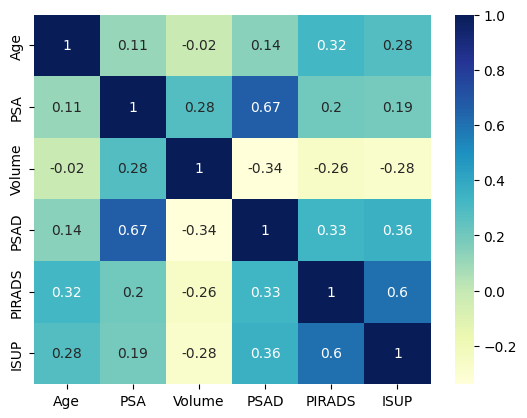

In [9]:
#To analyze the corelationship b/w values.
sns.heatmap(baseline.corr(), cmap="YlGnBu", annot=True);

C:\Users\imran\AppData\Local\Temp\ipykernel_15344\1811785826.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(biopsy.corr(), cmap="YlGnBu", annot=True);


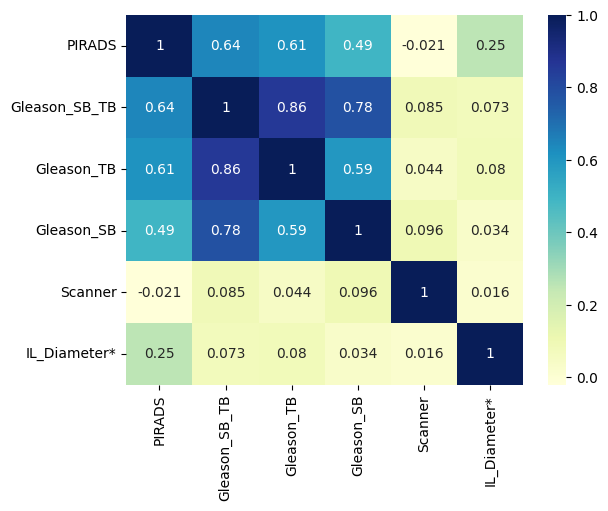

In [10]:
#To analyze the corelationship b/w values.
sns.heatmap(biopsy.corr(), cmap="YlGnBu", annot=True);

In [19]:
temp= baseline['PIRADS'].value_counts().to_frame().sort_values(by='PIRADS',ascending=False)
temp.style.background_gradient(cmap='Purples')
temp['PIRADS_GRADE'] =temp.index
temp = temp.reindex(columns=['PIRADS_GRADE','PIRADS'])

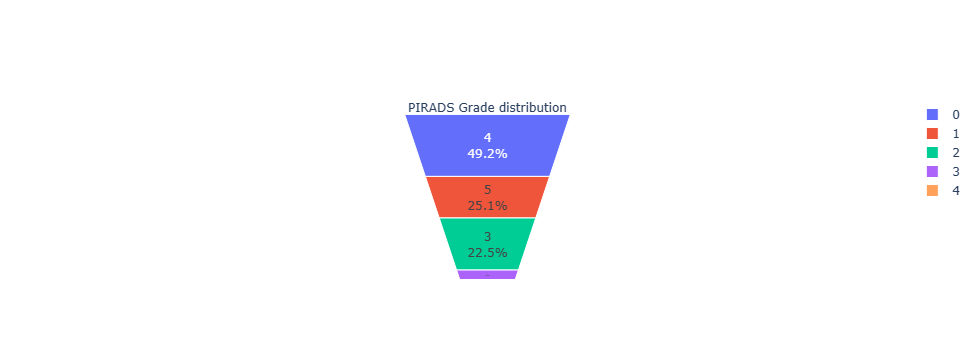

In [20]:
fig = go.Figure(go.Funnelarea(
    text =temp.PIRADS_GRADE,
    values = temp.PIRADS,
    title = {"position": "top center", "text": "PIRADS Grade distribution"}
    ))
fig.show()

In [11]:
temp= baseline['ISUP'].value_counts().to_frame().sort_values(by='ISUP',ascending=False)
temp.style.background_gradient(cmap='Purples')
temp['ISUP_GRADE'] =temp.index
temp = temp.reindex(columns=['ISUP_GRADE','ISUP'])

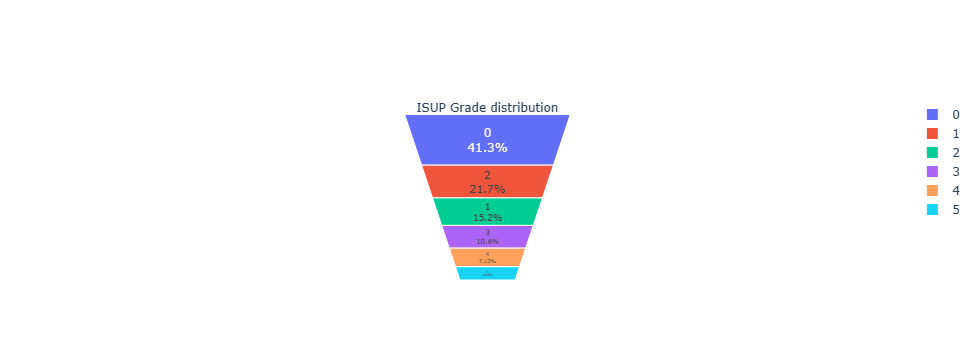

In [13]:
fig = go.Figure(go.Funnelarea(
    text =temp.ISUP_GRADE,
    values = temp.ISUP,
    title = {"position": "top center", "text": "ISUP Grade distribution"}
    ))
fig.show()